# Employee Attrition

In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay




In [2]:

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read the dataset into a pandas DataFrame
hr_Attrition = pd.read_csv('HR-Employee-Attrition.csv')

In [4]:
hr_Attrition.shape

(1470, 35)

In [5]:
hr_Attrition.shape

(1470, 35)

In [6]:
hr_Attrition

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [7]:
hr_Attrition.head(5)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [8]:
hr_Attrition.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [9]:
hr_Attrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [10]:
hr_Attrition.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [11]:
hr_Attrition.describe(include=object).T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


In [12]:
hr_Attrition.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# Exploratory Data Analysis

In [13]:
# Handle missing values
hr_Attrition = hr_Attrition.dropna()

In [14]:
# To convert the target (categorical variable ) into numerical
hr_Attrition['Attrition'] = hr_Attrition['Attrition'].map({'Yes': 1, 'No': 0})

In [15]:
hr_Attrition.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [16]:
hr_Attrition.isnull().values.any()  # if false -> no missing value

False

In [17]:
hr_Attrition.apply(lambda x: sum(x.isnull()))  # to calculate the no of missing value

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [18]:
hr_Attrition[hr_Attrition['Attrition']==1].shape[0] # calculate the total no of employers left

237

In [19]:
hr_Attrition[hr_Attrition['Attrition']==0].shape[0] 

1233

In [21]:
grp_Attrition = hr_Attrition[hr_Attrition['Attrition']==1].mean()    # Divide working employees and those who left in different groups
print(grp_Attrition)

TypeError: Could not convert ['Travel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_FrequentlyTravel_RarelyNon-TravelTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyNon-TravelTravel_FrequentlyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_FrequentlyTravel_FrequentlyTravel_FrequentlyTravel_FrequentlyTravel_RarelyNon-TravelTravel_FrequentlyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyNon-TravelNon-TravelTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyNon-TravelTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_FrequentlyTravel_RarelyTravel_RarelyNon-TravelTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_FrequentlyTravel_FrequentlyNon-TravelTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyNon-TravelTravel_RarelyNon-TravelTravel_FrequentlyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_FrequentlyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyNon-TravelTravel_FrequentlyTravel_FrequentlyTravel_RarelyTravel_FrequentlyTravel_FrequentlyTravel_RarelyTravel_FrequentlyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyNon-TravelTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_FrequentlyTravel_FrequentlyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_Rarely'
 'SalesResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesHuman ResourcesResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentSalesSalesResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentSalesSalesResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentSalesSalesSalesSalesSalesSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesSalesResearch & DevelopmentHuman ResourcesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentHuman ResourcesResearch & DevelopmentHuman ResourcesSalesResearch & DevelopmentSalesResearch & DevelopmentSalesSalesSalesSalesResearch & DevelopmentResearch & DevelopmentSalesSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentSalesSalesResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesSalesResearch & DevelopmentSalesSalesResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentHuman ResourcesSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentSalesSalesResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesSalesSalesResearch & DevelopmentResearch & DevelopmentSalesSalesSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentSalesSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentHuman ResourcesSalesSalesSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesSalesSalesResearch & DevelopmentSalesResearch & DevelopmentSalesResearch & DevelopmentSalesHuman ResourcesSalesSalesSalesHuman ResourcesSalesSalesSalesResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentHuman ResourcesResearch & DevelopmentHuman ResourcesHuman ResourcesSalesResearch & DevelopmentSalesSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesSalesResearch & DevelopmentHuman ResourcesResearch & DevelopmentSalesSalesSalesResearch & DevelopmentResearch & DevelopmentSalesSales'
 'Life SciencesOtherLife SciencesLife SciencesMedicalLife SciencesTechnical DegreeMedicalMarketingLife SciencesTechnical DegreeLife SciencesTechnical DegreeMedicalMedicalHuman ResourcesLife SciencesMarketingLife SciencesLife SciencesLife SciencesMedicalMarketingLife SciencesLife SciencesMedicalTechnical DegreeLife SciencesMarketingLife SciencesMedicalMarketingMedicalTechnical DegreeMarketingTechnical DegreeMedicalMedicalLife SciencesLife SciencesMedicalMedicalLife SciencesLife SciencesLife SciencesMedicalMarketingLife SciencesMedicalMedicalMedicalOtherTechnical DegreeMarketingMarketingMarketingLife SciencesMarketingTechnical DegreeTechnical DegreeMedicalTechnical DegreeMarketingTechnical DegreeTechnical DegreeMedicalMedicalLife SciencesHuman ResourcesTechnical DegreeLife SciencesMarketingTechnical DegreeOtherLife SciencesLife SciencesMedicalMarketingLife SciencesMedicalLife SciencesLife SciencesTechnical DegreeLife SciencesMedicalOtherLife SciencesMedicalTechnical DegreeLife SciencesLife SciencesMarketingLife SciencesMedicalMarketingMedicalMedicalLife SciencesMedicalLife SciencesLife SciencesMedicalOtherLife SciencesLife SciencesMedicalMarketingOtherTechnical DegreeLife SciencesLife SciencesTechnical DegreeLife SciencesMedicalLife SciencesLife SciencesOtherMedicalMedicalMedicalMedicalMarketingLife SciencesOtherLife SciencesMarketingLife SciencesLife SciencesTechnical DegreeMedicalTechnical DegreeMedicalTechnical DegreeMedicalMedicalMedicalOtherLife SciencesMedicalMarketingMedicalLife SciencesLife SciencesLife SciencesMarketingLife SciencesLife SciencesLife SciencesLife SciencesMedicalLife SciencesMarketingLife SciencesMedicalTechnical DegreeLife SciencesMedicalMarketingLife SciencesLife SciencesLife SciencesMedicalMarketingLife SciencesMarketingMedicalLife SciencesLife SciencesOtherLife SciencesLife SciencesLife SciencesMarketingLife SciencesLife SciencesLife SciencesTechnical DegreeTechnical DegreeTechnical DegreeMedicalMedicalMedicalTechnical DegreeLife SciencesLife SciencesLife SciencesLife SciencesTechnical DegreeMedicalMedicalMedicalMedicalMedicalLife SciencesOtherMedicalMedicalLife SciencesLife SciencesHuman ResourcesLife SciencesMarketingLife SciencesHuman ResourcesMarketingLife SciencesMarketingTechnical DegreeMarketingMedicalMedicalLife SciencesLife SciencesMedicalMedicalMedicalHuman ResourcesHuman ResourcesMarketingLife SciencesLife SciencesMedicalLife SciencesTechnical DegreeLife SciencesTechnical DegreeMarketingLife SciencesHuman ResourcesTechnical DegreeMarketingLife SciencesMarketingMedicalTechnical DegreeLife SciencesMarketing'
 'FemaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleFemaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleMale'
 'Sales ExecutiveLaboratory TechnicianLaboratory TechnicianSales RepresentativeResearch ScientistResearch ScientistSales RepresentativeResearch ScientistSales RepresentativeLaboratory TechnicianResearch DirectorLaboratory TechnicianLaboratory TechnicianResearch ScientistSales ExecutiveHuman ResourcesLaboratory TechnicianSales ExecutiveLaboratory TechnicianResearch ScientistSales ExecutiveHealthcare RepresentativeSales RepresentativeSales ExecutiveManufacturing DirectorLaboratory TechnicianSales RepresentativeLaboratory TechnicianSales RepresentativeManufacturing DirectorHealthcare RepresentativeSales ExecutiveSales ExecutiveResearch ScientistSales ExecutiveResearch ScientistResearch ScientistLaboratory TechnicianLaboratory TechnicianLaboratory TechnicianManufacturing DirectorLaboratory TechnicianLaboratory TechnicianManagerLaboratory TechnicianLaboratory TechnicianSales ExecutiveLaboratory TechnicianResearch ScientistResearch ScientistSales ExecutiveLaboratory TechnicianSales RepresentativeSales RepresentativeSales ExecutiveSales ExecutiveSales RepresentativeSales ExecutiveResearch ScientistResearch ScientistLaboratory TechnicianSales RepresentativeSales RepresentativeResearch ScientistHuman ResourcesManagerLaboratory TechnicianHealthcare RepresentativeHuman ResourcesLaboratory TechnicianHuman ResourcesSales RepresentativeLaboratory TechnicianSales ExecutiveLaboratory TechnicianSales RepresentativeSales ExecutiveSales RepresentativeSales ExecutiveResearch ScientistResearch ScientistSales ExecutiveSales ExecutiveResearch ScientistResearch ScientistResearch ScientistSales ExecutiveManagerSales ExecutiveLaboratory TechnicianLaboratory TechnicianSales ExecutiveResearch DirectorResearch ScientistSales ExecutiveSales ExecutiveResearch ScientistResearch ScientistSales RepresentativeLaboratory TechnicianLaboratory TechnicianSales RepresentativeResearch ScientistManufacturing DirectorLaboratory TechnicianLaboratory TechnicianSales RepresentativeSales RepresentativeLaboratory TechnicianSales ExecutiveSales ExecutiveResearch ScientistSales ExecutiveResearch ScientistResearch ScientistResearch ScientistLaboratory TechnicianResearch ScientistLaboratory TechnicianHealthcare RepresentativeSales ExecutiveManagerLaboratory TechnicianLaboratory TechnicianResearch ScientistSales RepresentativeLaboratory TechnicianResearch ScientistHealthcare RepresentativeHuman ResourcesSales ExecutiveResearch ScientistLaboratory TechnicianLaboratory TechnicianResearch ScientistLaboratory TechnicianSales ExecutiveHealthcare RepresentativeLaboratory TechnicianSales ExecutiveLaboratory TechnicianSales ExecutiveSales ExecutiveLaboratory TechnicianSales ExecutiveResearch ScientistResearch ScientistResearch ScientistLaboratory TechnicianResearch ScientistSales RepresentativeManagerLaboratory TechnicianHealthcare RepresentativeLaboratory TechnicianLaboratory TechnicianResearch ScientistSales ExecutiveSales ExecutiveSales RepresentativeLaboratory TechnicianManufacturing DirectorSales ExecutiveSales RepresentativeSales ExecutiveManufacturing DirectorResearch ScientistLaboratory TechnicianHealthcare RepresentativeSales RepresentativeResearch ScientistSales RepresentativeSales ExecutiveLaboratory TechnicianManufacturing DirectorLaboratory TechnicianHuman ResourcesSales RepresentativeSales ExecutiveSales ExecutiveLaboratory TechnicianLaboratory TechnicianResearch ScientistLaboratory TechnicianResearch ScientistSales ExecutiveLaboratory TechnicianManufacturing DirectorManufacturing DirectorLaboratory TechnicianSales RepresentativeSales ExecutiveSales ExecutiveLaboratory TechnicianSales ExecutiveLaboratory TechnicianSales RepresentativeLaboratory TechnicianSales RepresentativeHuman ResourcesSales ExecutiveSales ExecutiveSales ExecutiveHuman ResourcesSales RepresentativeSales ExecutiveSales ExecutiveResearch ScientistSales RepresentativeLaboratory TechnicianResearch ScientistSales ExecutiveLaboratory TechnicianManufacturing DirectorHuman ResourcesHealthcare RepresentativeHuman ResourcesHuman ResourcesSales ExecutiveResearch ScientistSales ExecutiveSales RepresentativeResearch ScientistResearch ScientistLaboratory TechnicianSales RepresentativeSales ExecutiveResearch ScientistHuman ResourcesLaboratory TechnicianSales ExecutiveSales ExecutiveSales RepresentativeResearch ScientistLaboratory TechnicianSales ExecutiveSales Executive'
 'SingleSingleSingleSingleSingleSingleMarriedMarriedMarriedSingleMarriedSingleSingleMarriedSingleDivorcedSingleSingleSingleMarriedMarriedMarriedSingleMarriedSingleSingleSingleSingleSingleMarriedMarriedMarriedMarriedSingleSingleSingleSingleMarriedMarriedSingleDivorcedSingleSingleMarriedDivorcedDivorcedSingleSingleMarriedMarriedMarriedMarriedSingleSingleSingleMarriedSingleSingleSingleSingleMarriedSingleDivorcedMarriedSingleMarriedDivorcedMarriedDivorcedSingleDivorcedSingleSingleMarriedMarriedMarriedDivorcedDivorcedMarriedSingleSingleSingleMarriedSingleDivorcedSingleSingleMarriedSingleMarriedMarriedSingleSingleSingleMarriedSingleMarriedDivorcedDivorcedSingleDivorcedSingleSingleMarriedDivorcedMarriedMarriedSingleSingleMarriedMarriedSingleSingleSingleSingleMarriedDivorcedSingleSingleMarriedSingleMarriedSingleDivorcedMarriedSingleSingleMarriedSingleMarriedSingleSingleMarriedDivorcedSingleDivorcedSingleDivorcedSingleSingleMarriedMarriedSingleMarriedSingleSingleMarriedDivorcedMarriedSingleSingleSingleSingleMarriedDivorcedMarriedSingleSingleSingleSingleMarriedMarriedSingleSingleMarriedMarriedSingleSingleSingleSingleSingleMarriedDivorcedSingleSingleMarriedMarriedMarriedSingleSingleSingleSingleSingleSingleSingleMarriedDivorcedMarriedMarriedMarriedSingleMarriedDivorcedSingleSingleSingleMarriedSingleDivorcedMarriedMarriedDivorcedSingleDivorcedSingleSingleMarriedMarriedSingleMarriedDivorcedSingleMarriedSingleMarriedMarriedMarriedDivorcedSingleSingleMarriedSingleSingleMarriedSingleSingleSingleSingleMarriedDivorcedMarriedSingleMarriedMarriedMarriedDivorcedDivorced'
 'YYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYY'
 'YesYesYesNoNoYesNoYesYesNoNoYesYesYesNoYesYesYesYesYesYesNoYesYesNoNoNoNoYesYesYesNoNoYesNoNoYesYesNoYesNoNoNoYesYesYesYesNoNoYesYesYesYesYesNoYesNoYesNoYesNoYesNoNoNoYesNoNoYesNoYesYesYesNoYesNoNoNoNoYesYesNoYesYesYesYesYesYesNoYesYesNoYesNoNoNoYesYesYesYesYesNoNoYesYesYesYesYesNoYesNoNoYesYesYesYesYesYesNoNoNoNoNoNoYesYesNoYesNoNoYesNoYesNoYesNoYesNoNoYesNoNoYesYesNoYesYesNoNoYesYesYesNoNoYesNoNoYesYesYesNoYesYesNoYesYesYesNoYesNoNoNoNoYesNoYesNoNoNoYesYesNoNoNoNoNoYesNoNoYesYesNoYesYesYesYesYesNoYesNoNoYesNoNoNoYesNoYesNoYesYesYesNoNoYesNoNoYesYesYesNoNoYesYesNoNoYesYesNoNoYesYesNoYesNoNoYes'] to numeric

In [ ]:
pip list

In [ ]:
grp_nonAttrition = hr_Attrition[hr_Attrition['Attrition']==0].mean()    # Divide working employees and those who left in different groups
print(grp_nonAttrition)

In [ ]:
hr_Attrition.drop(columns=['EmployeeCount', 'StandardHours','Over18'], inplace=True)

In [ ]:
corr = hr_Attrition.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr, square=True)
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation coefficients
correlation_matrix = hr_Attrition.corr()
target_correlation = correlation_matrix['Attrition'].drop('Attrition')

# Create a heatmap
plt.figure(figsize=(24, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

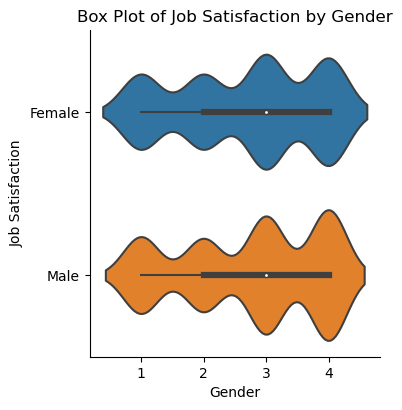

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'hr_Attrition' is your DataFrame
# Replace 'hr_Attrition' with the actual name of your DataFrame
sns.catplot(x='JobSatisfaction', y='Gender', data=hr_Attrition, kind='violin', height=4)
plt.title('Box Plot of Job Satisfaction by Gender')
plt.xlabel('Gender')
plt.ylabel('Job Satisfaction')
plt.show()


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'hr_Attrition' is your DataFrame
# Replace 'hr_Attrition' with the actual name of your DataFrame
#left= hr_Attrition[hr_Attrition['Attrition']==1]
sns.factorplot(x='Attrition', y='MonthlyIncome', data=hr_Attrition, kind='box', size=6)
plt.title('Box Plot of Attrition by MonthlyIncome')
plt.xlabel('Attrition')
plt.ylabel('Monthly Income')
plt.show()

AttributeError: module 'seaborn' has no attribute 'factorplot'

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'hr_Attrition' is your DataFrame
# Replace 'hr_Attrition' with the actual name of your DataFrame
sns.factorplot(x='JobSatisfaction', y='MonthlyIncome', data=hr_Attrition, kind='box', size=6)
plt.title('Box Plot of Job Satisfaction by MonthlyIncome')
plt.xlabel('Montly Income')
plt.ylabel('Job Satisfaction')
plt.show()

AttributeError: module 'seaborn' has no attribute 'factorplot'

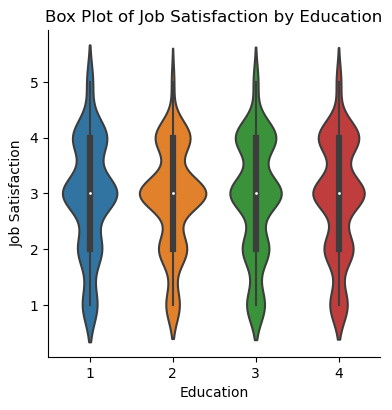

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'hr_Attrition' is your DataFrame
# Replace 'hr_Attrition' with the actual name of your DataFrame
sns.factorplot(x='JobSatisfaction', y='Education', data=hr_Attrition, kind='violin', size=4)
plt.title('Box Plot of Job Satisfaction by Education')
plt.xlabel('Education')
plt.ylabel('Job Satisfaction')
plt.show()

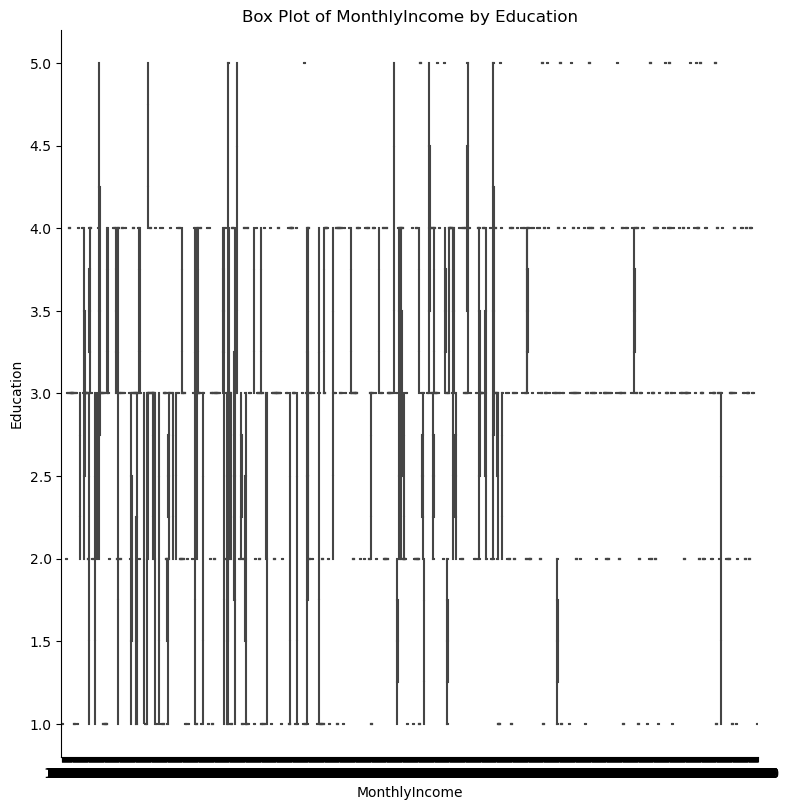

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'hr_Attrition' is your DataFrame
# Replace 'hr_Attrition' with the actual name of your DataFrame
sns.factorplot(x='MonthlyIncome', y='Education', data=hr_Attrition, kind='box', size=8)
plt.title('Box Plot of MonthlyIncome by Education')
plt.xlabel('MonthlyIncome')
plt.ylabel('Education')
plt.show()

In [44]:
import plotly.graph_objects as go

# Assuming 'hr_Attrition' is your DataFrame
# Replace 'hr_Attrition' with the actual name of your DataFrame
grp_Attrition = hr_Attrition[hr_Attrition['Attrition'] != 0]
grp_nonAttrition = hr_Attrition[hr_Attrition['Attrition'] == 0]

labels = ['Attrition', 'Non-Attrition']
values = [len(grp_Attrition), len(grp_nonAttrition)]

trace = go.Pie(labels=labels, values=values, 
               textfont=dict(size=15),
               marker=dict(colors=['#B9C0C9', 'yellow'], 
               line=dict(color='#000000', width=1.5)))
layout = dict(title='Distribution of Attrition')
fig = go.Figure(data=[trace], layout=layout)
fig.show()




NonAttrition



 BAsed on attrition


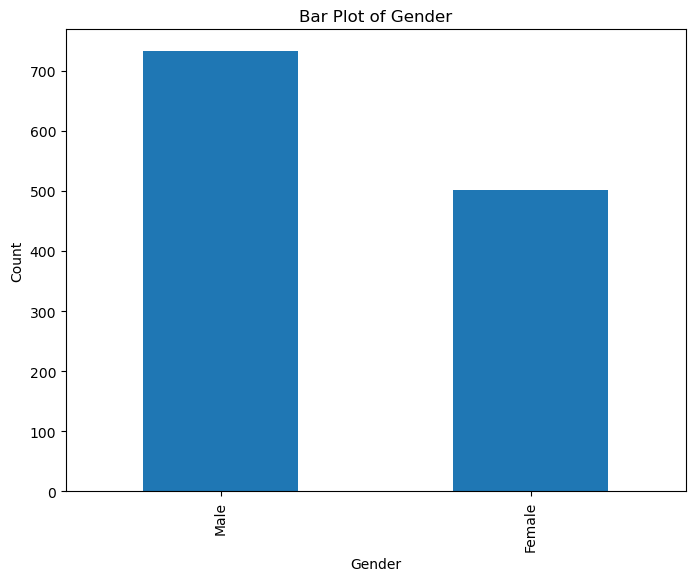

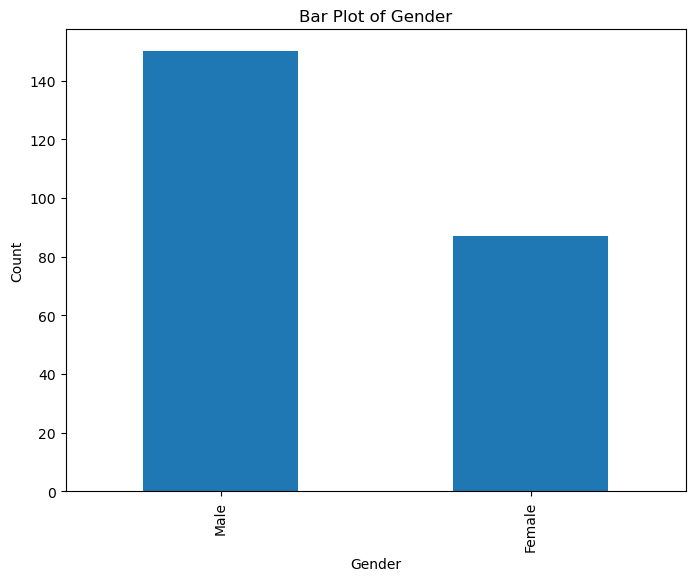

In [41]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go

def plot_pie(df, column):
    counts = df[column].value_counts()
    labels = counts.index
    values = counts.values

    fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
    fig.update_layout(title=f'Distribution of  {column}')
    fig.show()

def barplot(df, column, horizontal=True):
    counts = df[column].value_counts()
    plt.figure(figsize=(8, 6))
    if horizontal:
        counts.plot(kind='barh')
        plt.xlabel('Count')
        plt.ylabel(column)
    else:
        counts.plot(kind='bar')
        plt.xlabel(column)
        plt.ylabel('Count')
    plt.title(f'Bar Plot of {column}')
    plt.show()

# Assuming 'hr_Attrition' is your DataFrame
# Replace 'hr_Attrition' with the actual name of your DataFrame

print('\n\nNonAttrition')
plot_pie(grp_nonAttrition, 'Gender')

print('\n BAsed on attrition')
plot_pie(grp_Attrition, 'Gender')

barplot(grp_nonAttrition, 'Gender', horizontal=False)
barplot(grp_Attrition, 'Gender', horizontal=False)


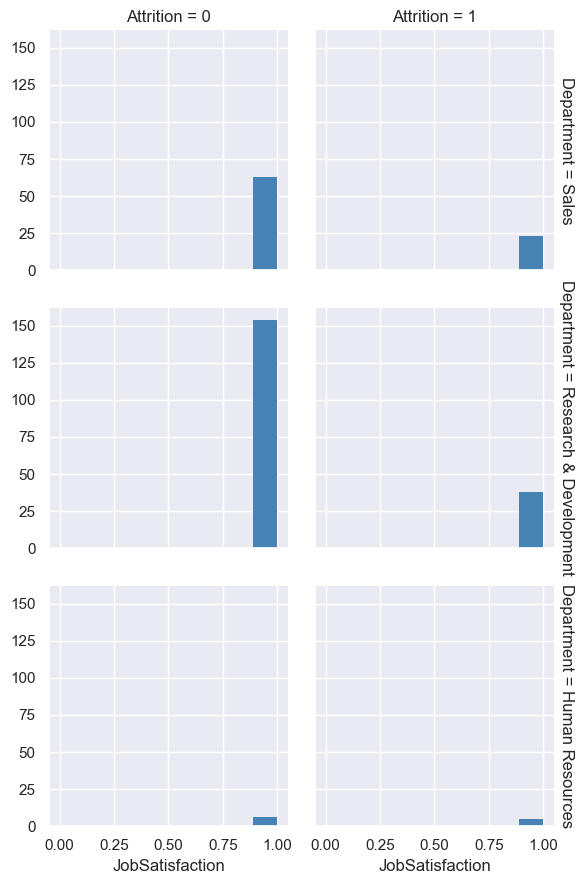

In [45]:
sns.set(style="darkgrid")
g = sns.FacetGrid(hr_Attrition, row="Department", col="Attrition", margin_titles=True)
bins = np.linspace(0, 1, 10)
g.map(plt.hist, "JobSatisfaction", color="steelblue", bins=bins, lw=0)



NonAttrition



 BAsed on attrition


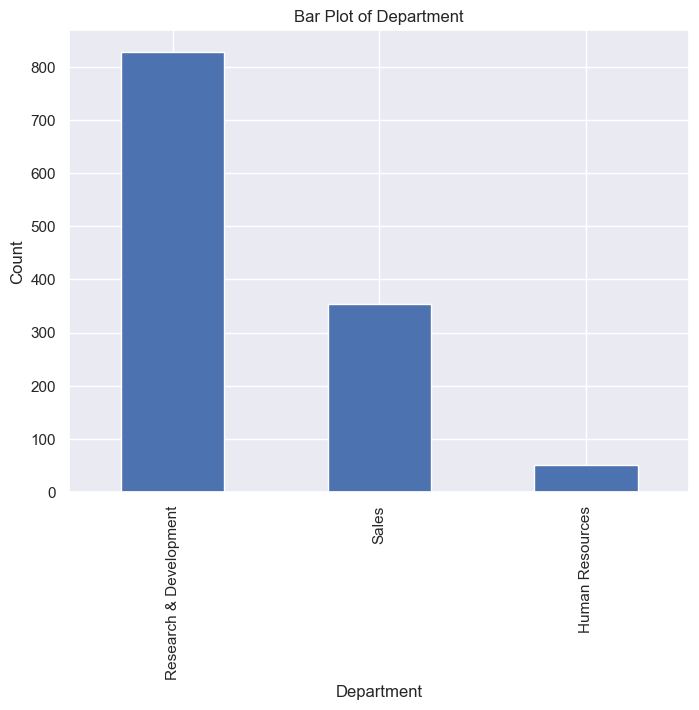

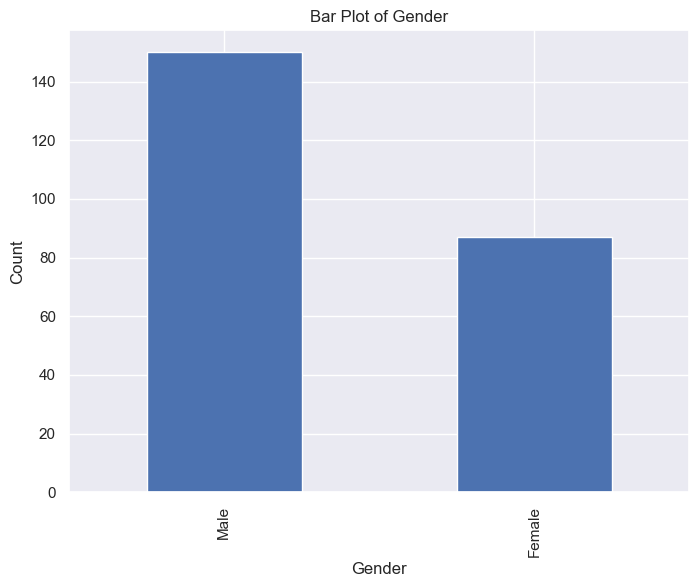

In [33]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go

def plot_pie(df, column):
    counts = df[column].value_counts()
    labels = counts.index
    values = counts.values

    fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
    fig.update_layout(title=f'Distribution of  {column}')
    fig.show()

def barplot(df, column, horizontal=True):
    counts = df[column].value_counts()
    plt.figure(figsize=(8, 6))
    if horizontal:
        counts.plot(kind='barh')
        plt.xlabel('Count')
        plt.ylabel(column)
    else:
        counts.plot(kind='bar')
        plt.xlabel(column)
        plt.ylabel('Count')
    plt.title(f'Bar Plot of {column}')
    plt.show()

# Assuming 'hr_Attrition' is your DataFrame
# Replace 'hr_Attrition' with the actual name of your DataFrame

print('\n\nNonAttrition')
plot_pie(grp_nonAttrition, 'Department')

print('\n BAsed on attrition')
plot_pie(grp_Attrition, 'Department')

barplot(grp_nonAttrition, 'Department', horizontal=False)
barplot(grp_Attrition, 'Gender', horizontal=False)


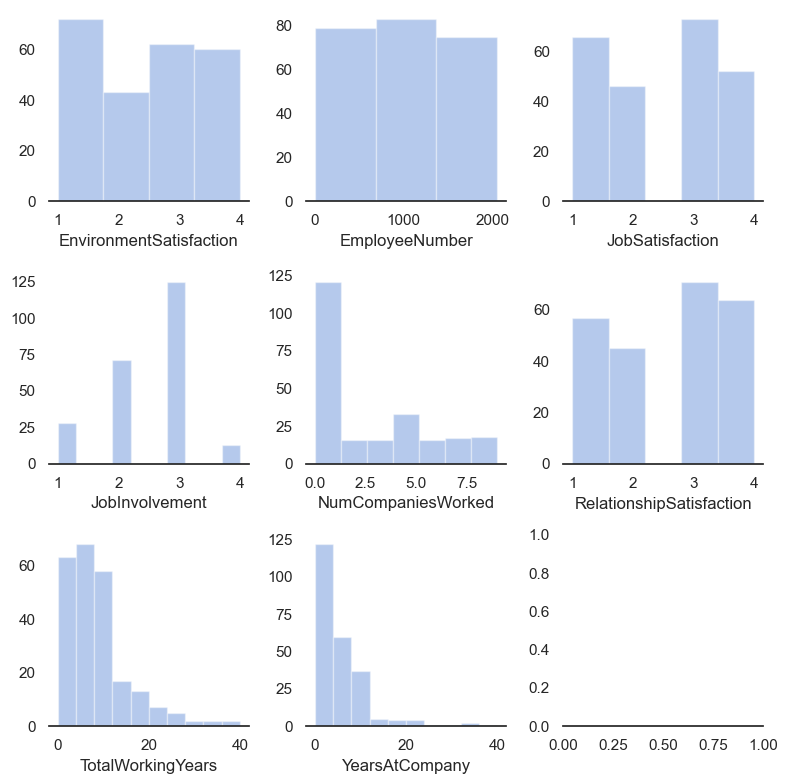

In [34]:
sns.set(style="white", palette="muted", color_codes=True)

# Set up the matplotlib figure
f, axes = plt.subplots(3, 3, figsize=(8,8))
sns.despine(left=True)

#people that left
leavers = hr_Attrition.loc[hr_Attrition['Attrition'] == 1]

# Plot a simple histogram with binsize determined automatically
#department_mapping = {'Sales': 1, 'Human Resources': 2, 'Research & Development': 3}

#hr_Attrition['Department'] = hr_Attrition['Department'].map(department_mapping)

sns.distplot(leavers['EnvironmentSatisfaction'], kde=False, color="b", ax=axes[0,0])
sns.distplot(leavers['EmployeeNumber'], bins=3, kde=False, color="b", ax=axes[0, 1])
sns.distplot(leavers['JobSatisfaction'], kde=False, color="b", ax=axes[0, 2])

sns.distplot(leavers['JobInvolvement'], kde=False, color="b", ax=axes[1,0])
sns.distplot(leavers['NumCompaniesWorked'], kde=False, color="b", ax=axes[1, 1])
sns.distplot(leavers['RelationshipSatisfaction'], kde=False, bins=5, color="b", ax=axes[1, 2])
sns.distplot(leavers['TotalWorkingYears'],bins=10, kde=False, color="b", ax=axes[2,0])
sns.distplot(leavers['YearsAtCompany'], bins=10,kde=False, color="b", ax=axes[2, 1])


plt.tight_layout()

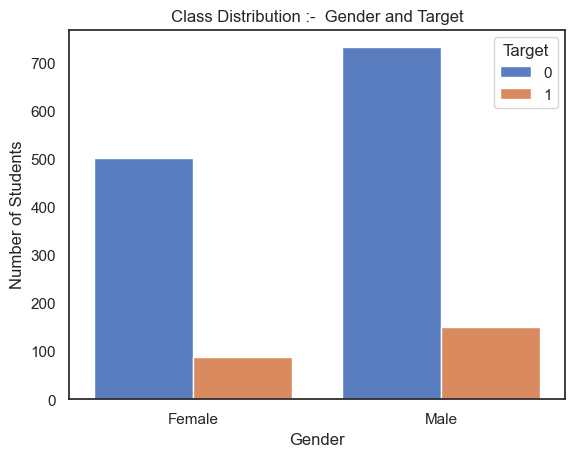

In [35]:
# target with gender

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=hr_Attrition, x='Gender', hue='Attrition')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.ylabel('Number of Students')
plt.xlabel('Gender')
plt.title('Class Distribution :-  Gender and Target')
plt.legend(title='Target', loc='upper right')
plt.show()

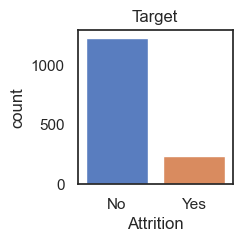

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(2, 2))
sns.countplot(data = hr_Attrition, x="Attrition").set_title('Target')
plt.xticks(ticks=[1,0], labels=['Yes','No'])
plt.show()

In [37]:
#checking class imbalance

class_imbalance = hr_Attrition['Attrition'].value_counts(normalize=True)
print(class_imbalance)

0    0.838776
1    0.161224
Name: Attrition, dtype: float64


In [38]:


plot_df=hr_Attrition.sort_values(by="Attrition")
fig=px.histogram(plot_df, x='MonthlyIncome', color='Attrition', 
                 opacity=0.8, histnorm='density', barmode='overlay', marginal='box',
                 color_discrete_map={'Yes': '#B9C0C9','No': '#CDBBA7'})
fig.update_layout(title_text='Distribution of Monthly Income by Attrition Status',
                  xaxis_title='Monthly Income, $', yaxis_title='Density',font_color='#28221D',
                  paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0', legend_traceorder='reversed')
fig.show()



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


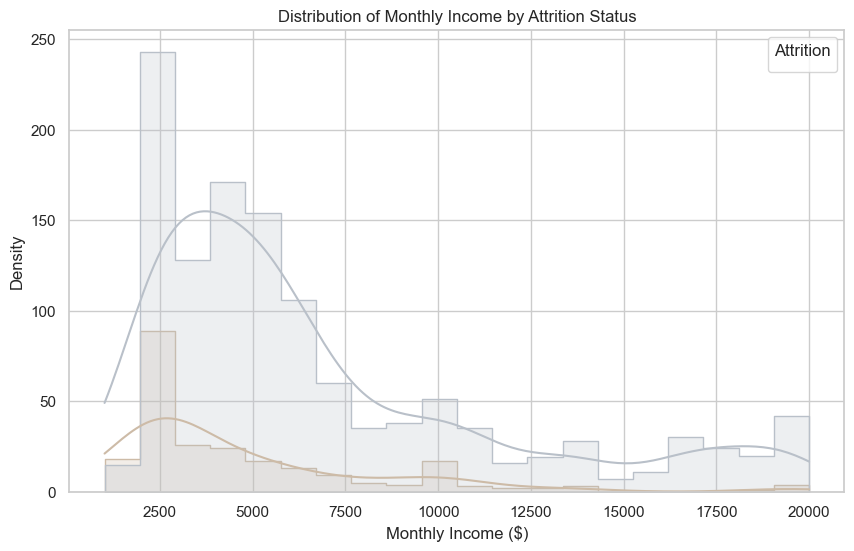

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'hr_Attrition' is your DataFrame containing the data
# Replace 'hr_Attrition' with the actual name of your DataFrame

# Set the style
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
sns.histplot(data=hr_Attrition, x='MonthlyIncome', hue='Attrition', element='step', kde=True, palette=['#B9C0C9', '#CDBBA7'])
plt.title('Distribution of Monthly Income by Attrition Status')
plt.xlabel('Monthly Income ($)')
plt.ylabel('Density')
plt.legend(title='Attrition', loc='upper right')
plt.show()


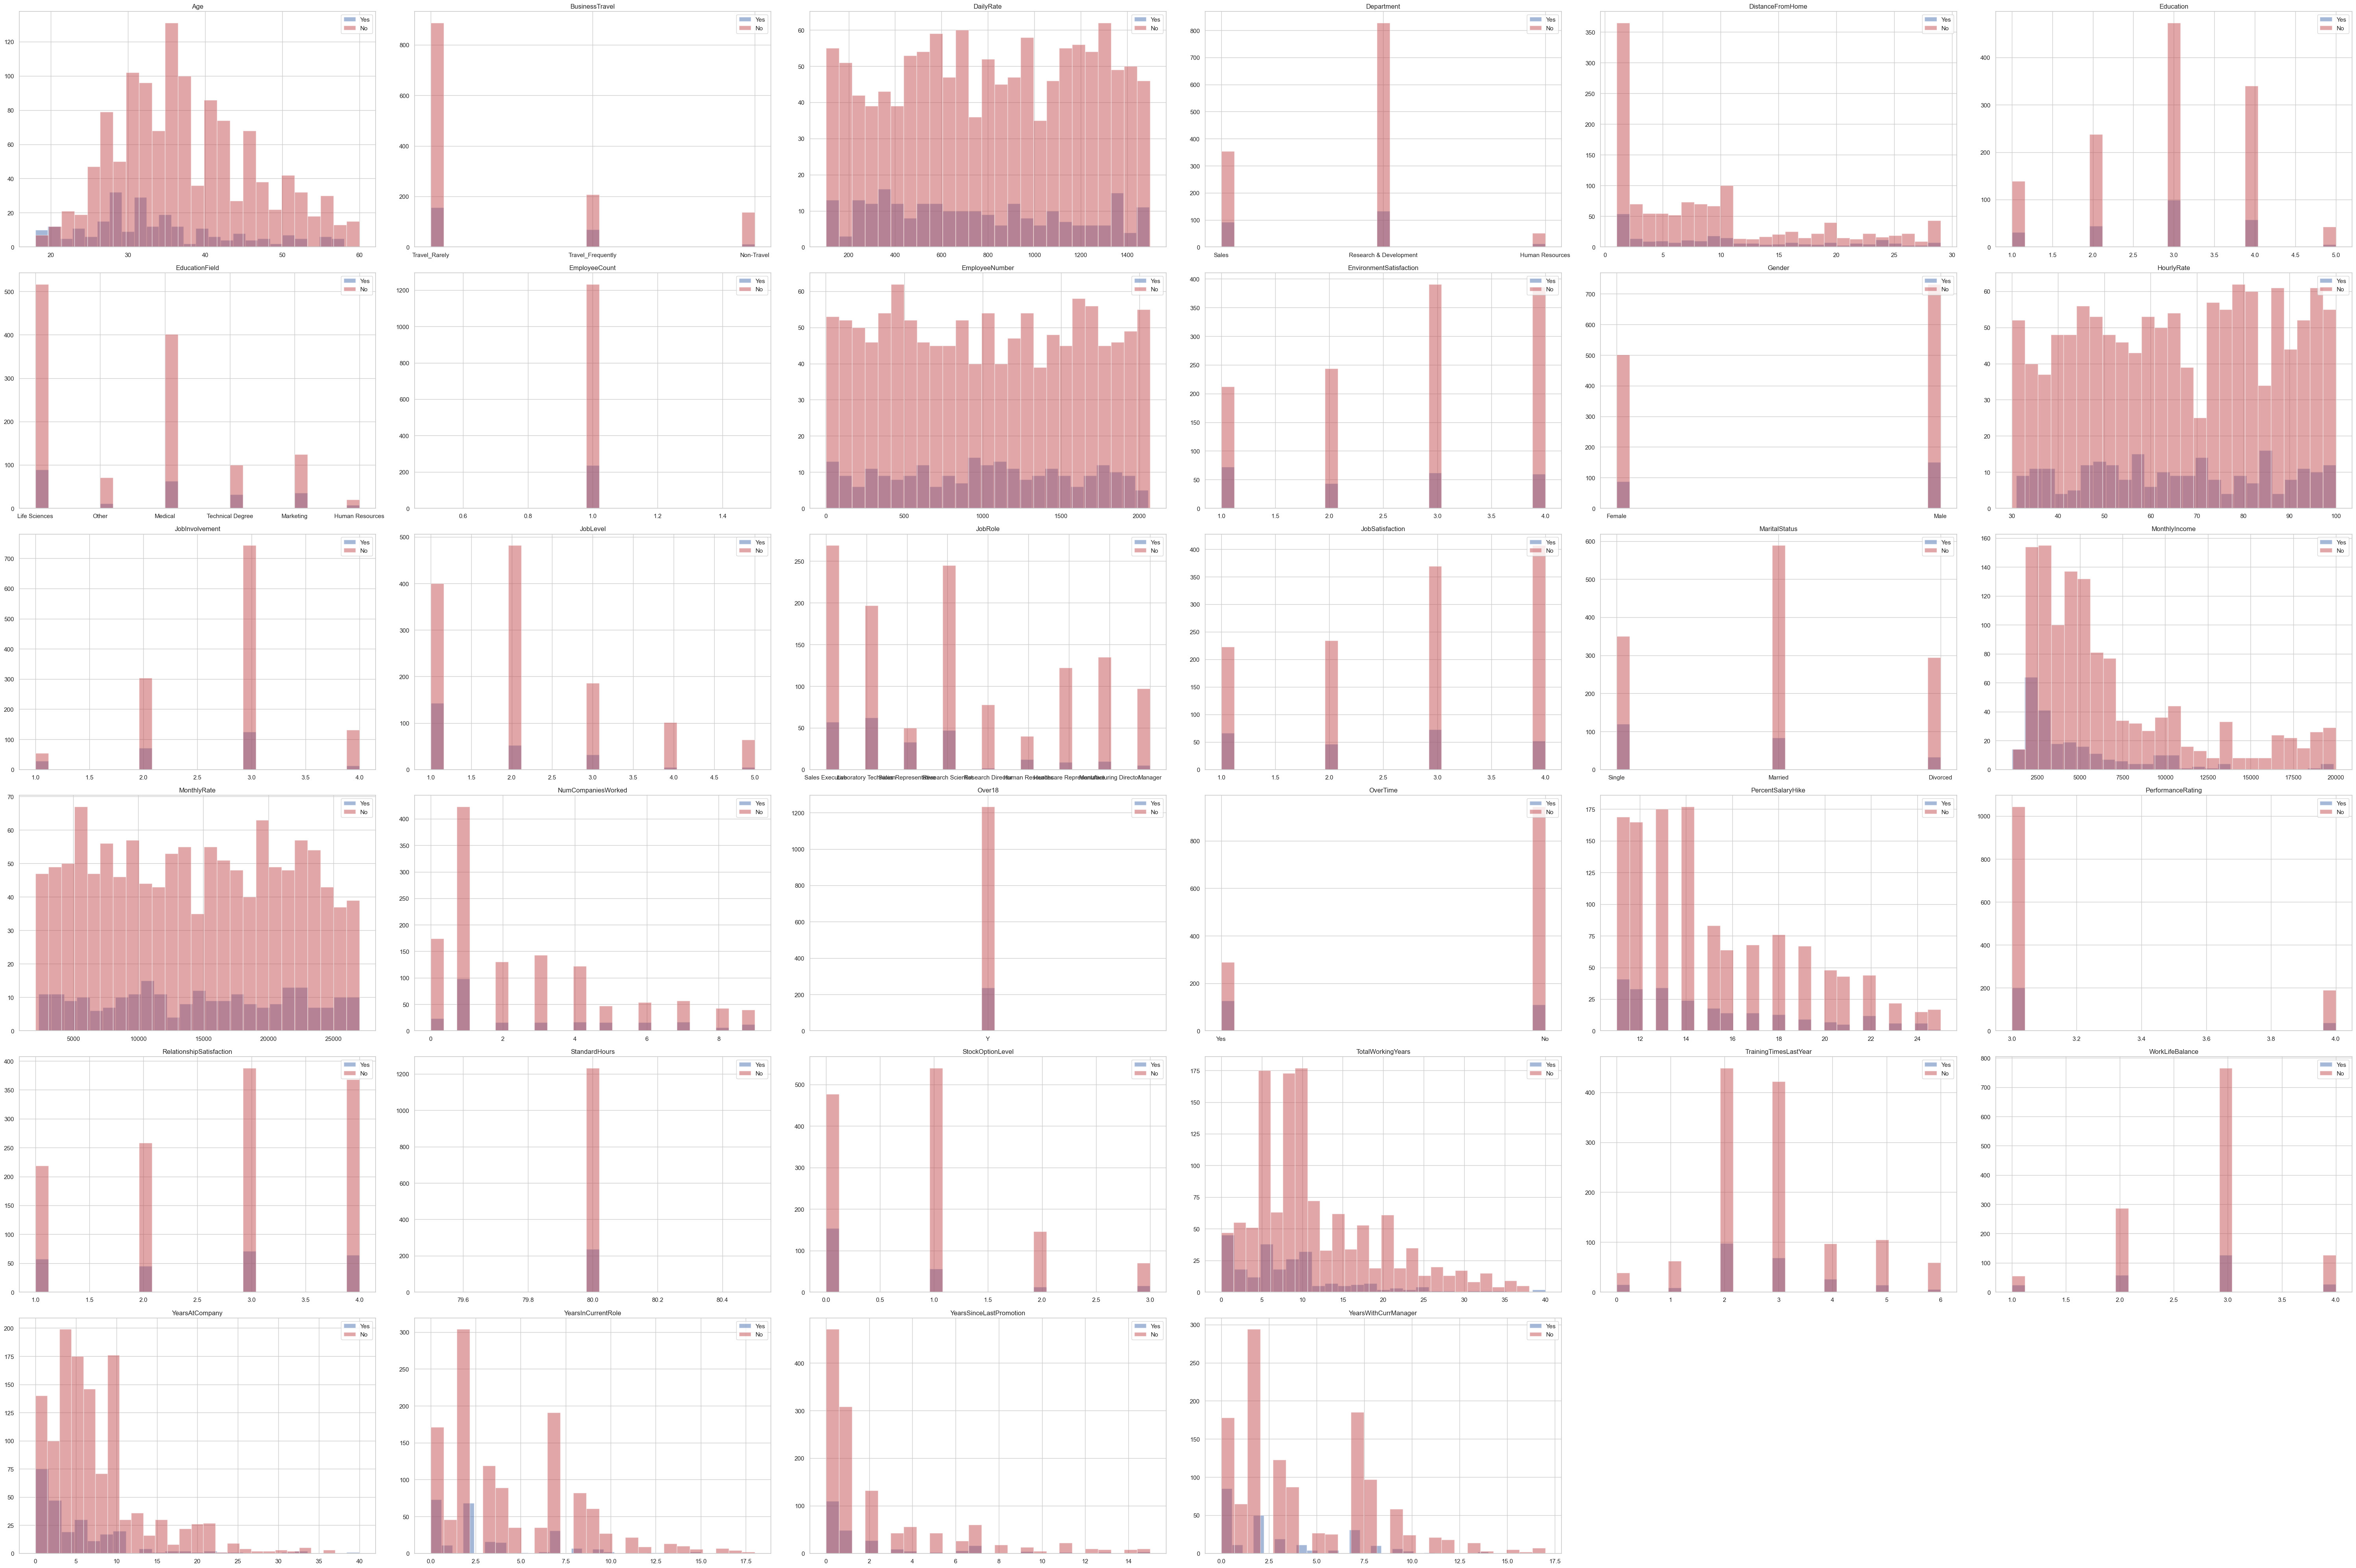

In [40]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame containing the data
# Replace 'df' with the actual name of your DataFrame
df= pd.read_csv('HR-Employee-Attrition.csv')
# Plot distributions
k = 1
plt.figure(figsize=(60, 40))
for col in df:
    if col == "Attrition":
        continue
    yes = df[df['Attrition'] == 'Yes'][col]
    no = df[df['Attrition'] == 'No'][col]
    plt.subplot(6, 6, k)
    plt.hist(yes, bins=25, alpha=0.5, label='Yes', color='b')
    plt.hist(no, bins=25, alpha=0.5, label='No', color='r')
    plt.legend(loc='upper right')
    plt.title(col)
    k += 1

plt.tight_layout()
plt.show()


# Encoding

In [41]:
# Importing the necessary library
from sklearn.preprocessing import OneHotEncoder

# Categorical columns
categorical_columns = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

encoder=LabelEncoder()
df[categorical_columns]=df[categorical_columns].apply(encoder.fit_transform)
print(df[categorical_columns])


      Attrition  BusinessTravel  Department  EducationField  Gender  JobRole  \
0             1               2           2               1       0        7   
1             0               1           1               1       1        6   
2             1               2           1               4       1        2   
3             0               1           1               1       0        6   
4             0               2           1               3       1        2   
...         ...             ...         ...             ...     ...      ...   
1465          0               1           1               3       1        2   
1466          0               2           1               3       1        0   
1467          0               2           1               1       1        4   
1468          0               1           2               3       1        7   
1469          0               2           1               3       1        2   

      MaritalStatus  OverTime  
0      

# RandomOver Sampling

In [42]:
#from imblearn.over_sampling import RandomOverSampler

In [1]:
pip show scikit-learn

Name: scikit-learnNote: you may need to restart the kernel to use updated packages.

Version: 1.4.1.post1
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: C:\Users\Sarath Kumar\anaconda3\Lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: daal4py, imbalanced-learn, scikit-learn-intelex


In [47]:
pip list


Package                       Version
----------------------------- ---------------
aiobotocore                   2.4.2
aiofiles                      22.1.0
aiohttp                       3.8.3
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anaconda-catalogs             0.2.0
anaconda-client               1.12.0
anaconda-navigator            2.4.2
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.11.0
backcal

In [2]:
pip uninstall scikit-learn


^C
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install --upgrade --force-reinstall scikit-learn==1.0.2


Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  Preparing metadata (pyproject.toml) did not run successfully.
  exit code: 1
  
  [66 lines of output]
  Partial import of sklearn during the build process.
  setup.py:128: DeprecationWarning:
  
    `numpy.distutils` is deprecated since NumPy 1.23.0, as a result
    of the deprecation of `distutils` itself. It will be removed for
    Python >= 3.12. For older Python versions it will remain present.
    It is recommended to use `setuptools < 60.0` for those Python versions.
    For more details, see:
      https://numpy.org/devdocs/reference/distutils_status_migration.html
  
  
    from numpy.distutils.command.build_ext import build_ext  # noqa
  INFO: No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  Traceback (most recent call last):
    File "C:\Users\Sarath Kumar\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
      main()
    File "C:\Use

  Using cached scikit-learn-1.0.2.tar.gz (6.7 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'error'


In [44]:
#pip install scikit-learn==1.0.2

In [2]:
from imblearn.over_sampling import RandomOverSampler
Y=df['Attrition']
X=df.drop(['EmployeeCount','Attrition','EmployeeNumber','Over18','StandardHours'],axis=1)
     

ros = RandomOverSampler(random_state=42)
X_, Y = ros.fit_resample(X,Y)
X = pd.DataFrame(X_,columns=X.columns)

ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (C:\Users\Sarath Kumar\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py)

# Train_Test_Data

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=4)

# PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
from sklearn.preprocessing import StandardScaler
pca = PCA(random_state=0)
principalComponents = pca.fit_transform(StandardScaler().fit_transform(X_train))
print(pca.explained_variance_ratio_)
print('Two PCs explain', sum(pca.explained_variance_ratio_)*100, '% of variance cumulatively')
# scree plot
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()
     

In [ ]:
pca = PCA(random_state=0)
principalComponents = pca.fit_transform(X_train)
print(pca.explained_variance_ratio_)
print('Two PCs explain ', sum(pca.explained_variance_ratio_)*100, '% of variance cumulatively')
# scree plot
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()
     

In [ ]:
pca = PCA(n_components=2, random_state=0)
principalComponents = pca.fit_transform(X_train)
print(pca.explained_variance_ratio_)
print('Two PCs explain ', sum(pca.explained_variance_ratio_)*100, '% of variance cumulatively')
# scree plot
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()
     

# Decision Tree

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

hr_Attrition= DecisionTreeClassifier() 
hr_Attrition.fit(X_train, y_train)
hr_Attrition.score(X_test, y_test)
hr_Attrition_predictions = hr_Attrition.predict(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create a DecisionTreeClassifier
hr_Attrition = DecisionTreeClassifier()

# Train the model on the training data
hr_Attrition.fit(X_train, y_train)

# Calculate and print the accuracy on the test data
accuracy = hr_Attrition.score(X_test, y_test)
print("Accuracy on the test data:", accuracy)

# Make predictions on the test data
df_predictions = df.predict(X_test)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# Create a DecisionTreeClassifier
df = DecisionTreeClassifier()

# Train the model on the training data
df.fit(X_train, y_train)

# Make predictions on the test data
df_predictions = df.predict(X_test)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, df_predictions)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

In [ ]:
# Display the confusion matrix as a heatmap
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', cbar=False,
            xticklabels=df.classes_, yticklabels=df.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Generate and display a classification report
classification_rep = classification_report(y_test, df_predictions)
print("Classification Report:")
print(classification_rep)

# LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a Logistic Regression classifier
logistic_regression = LogisticRegression()

# Train the model on the training data
logistic_regression.fit(X_train, y_train)

# Make predictions on the test data
logistic_regression_predictions = logistic_regression.predict(X_test)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, logistic_regression_predictions)

# Display the confusion matrix as a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', cbar=False,
            xticklabels=logistic_regression.classes_, yticklabels=logistic_regression.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Generate and display a classification report
classification_rep = classification_report(y_test, logistic_regression_predictions)
print("Classification Report:")
print(classification_rep)


In [ ]:
#RandomForest CLassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
random_forest.fit(X_train, y_train)

# Make predictions on the test data
random_forest_predictions = random_forest.predict(X_test)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, random_forest_predictions)

# Display the confusion matrix as a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', cbar=False,
            xticklabels=random_forest.classes_, yticklabels=random_forest.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Generate and display a classification report
classification_rep = classification_report(y_test, random_forest_predictions)
print("Classification Report:")
print(classification_rep)


# SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create an SVM classifier (you can choose the kernel and other hyperparameters)
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)

# Train the model on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
svm_predictions = svm_classifier.predict(X_test)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, svm_predictions)



In [ ]:

# Display the confusion matrix as a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', cbar=False,
            xticklabels=svm_classifier.classes_, yticklabels=svm_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Generate and display a classification report
classification_rep = classification_report(y_test, svm_predictions)
print("Classification Report:")
print(classification_rep)